# Mamber Anomalies

## Variaveis de Interesse 

In [1]:
target_anomalies = ['Q66','Q69','Q71','Q72','Q73','Q743']
target_years = list(range(2010,2020))
target_states = ['SP']

## Importing Libs

In [45]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.getcwd()).replace('= ',''),'..'))
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from src.features.feature_selection import Feature_Selection
from src.features.feature_engineering import Feature_Engineering
from src.visualization.visualize import Visualizer
from src.data.retrievers import SINASC_Retriever
from src.data.explorer import GraphExplorer
from src.io_utils import IO_Utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
root_dir = os.path.join(os.path.abspath(os.getcwd()).replace('= ',''),'..')
data_dir = os.path.join(root_dir,'data')
processed_data_dir = os.path.join(data_dir,'processed')

In [46]:
%load_ext autoreload
%autoreload 2
retriever = SINASC_Retriever()
fe = Feature_Engineering()
fs = Feature_Selection()
io_utils = IO_Utils()
ge = GraphExplorer()
vi = Visualizer()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating Processed Data

In [48]:
df_anomalies = retriever.extract_rows_anomalie(states=target_states,
                                                years=target_years,
                                                anomalie_codes=target_anomalies,
                                                anomalies_present=True)
df_no_anomalies = retriever.extract_rows_anomalie(states=target_states,
                                                years=target_years,
                                                anomalie_codes=target_anomalies,
                                                anomalies_present=False)

df_no_anomalies_cropped = df_no_anomalies.sample(frac=1)[:len(df_anomalies)].reset_index(drop=True)

In [52]:
io_utils.save_df_zipped_csv(df=df_no_anomalies_cropped,dirpath=processed_data_dir,file_name='df_no_member_anomalies')
io_utils.save_df_zipped_csv(df=df_anomalies,dirpath=processed_data_dir,file_name='df_member_anomalies')

## Getting Processed data

In [56]:
# df_anomalies = pd.read_csv(os.path.join(processed_data_dir,'df_member_anomalies.zip'))
# df_no_anomalies = pd.read_csv(os.path.join(processed_data_dir,'df_no_member_anomalies.zip'))
df = pd.concat([df_anomalies,df_no_anomalies_cropped], ignore_index=True).sample(frac=1).reset_index(drop=True)
df = df.drop(['CODANOMAL', 'STATE', 'YEAR','CONTADOR'],axis = 1)

## Raw Data Exploration

array([[<AxesSubplot:title={'center':'IDADEMAE'}>,
        <AxesSubplot:title={'center':'ESTCIVMAE'}>,
        <AxesSubplot:title={'center':'ESCMAE'}>,
        <AxesSubplot:title={'center':'QTDFILVIVO'}>,
        <AxesSubplot:title={'center':'QTDFILMORT'}>],
       [<AxesSubplot:title={'center':'GESTACAO'}>,
        <AxesSubplot:title={'center':'GRAVIDEZ'}>,
        <AxesSubplot:title={'center':'PARTO'}>,
        <AxesSubplot:title={'center':'CONSULTAS'}>,
        <AxesSubplot:title={'center':'SEXO'}>],
       [<AxesSubplot:title={'center':'APGAR1'}>,
        <AxesSubplot:title={'center':'APGAR5'}>,
        <AxesSubplot:title={'center':'RACACOR'}>,
        <AxesSubplot:title={'center':'PESO'}>,
        <AxesSubplot:title={'center':'RACACORMAE'}>],
       [<AxesSubplot:title={'center':'QTDGESTANT'}>,
        <AxesSubplot:title={'center':'QTDPARTNOR'}>,
        <AxesSubplot:title={'center':'QTDPARTCES'}>,
        <AxesSubplot:title={'center':'IDADEPAI'}>,
        <AxesSubplot:title={'cen

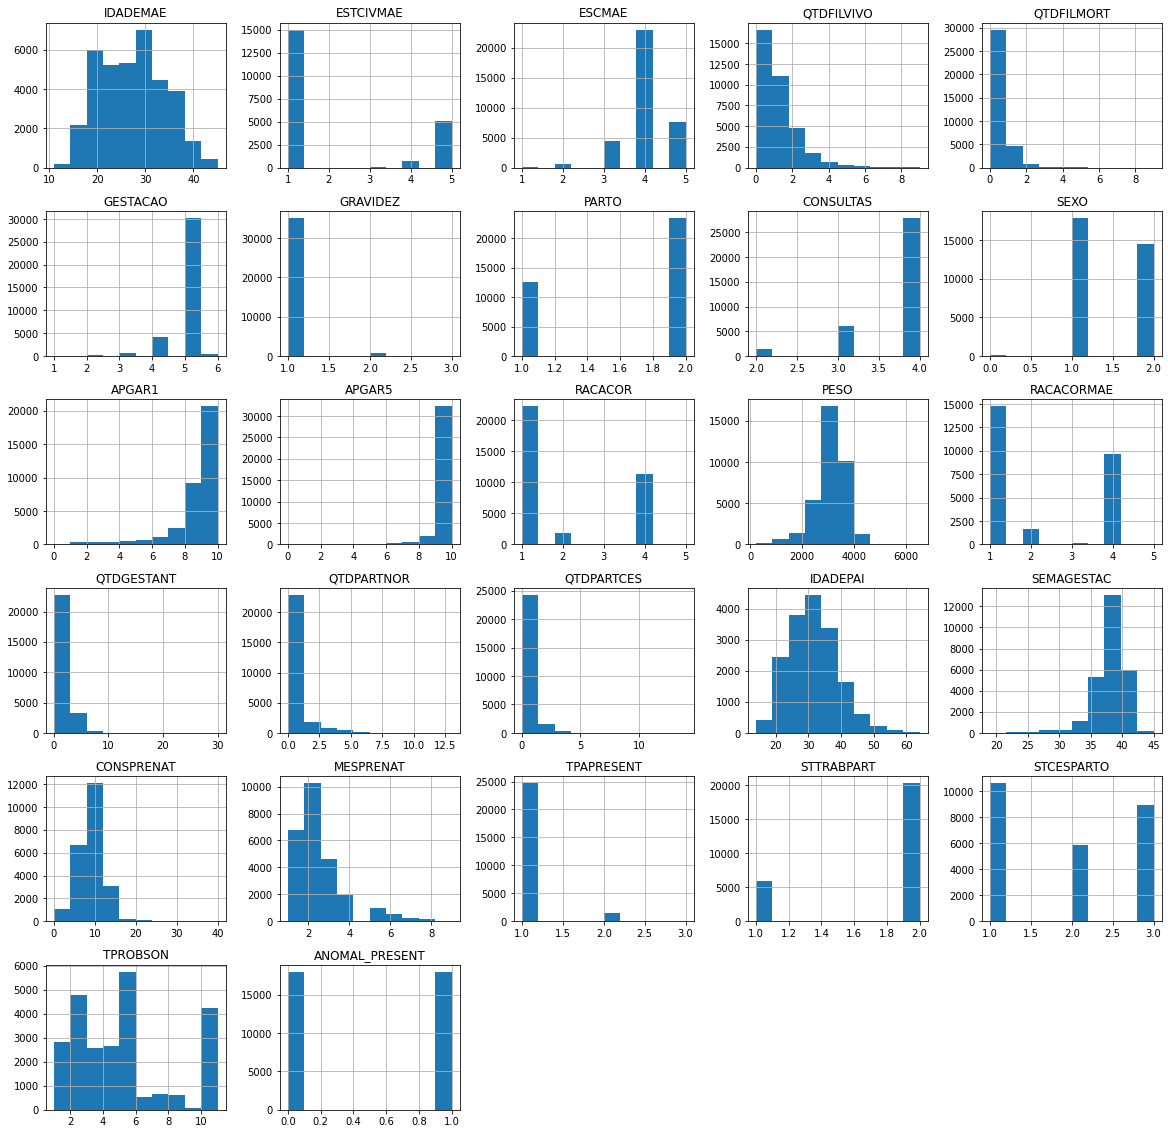

In [57]:
df.hist(figsize = (20,20))

In [ ]:
# ge.get_correlation_graphs(df)

In [ ]:
# ge.get_correlation_graphs_for_categorical_variable(df,ANOMAL_PRESENT)

## Feature Engineering and Feature Seselection

Inputar nos valores NaN

In [58]:
df = retriever.map_columns_as_categoricals(df)
df_cats = df.select_dtypes(['category'])
df_consts = df[[x for x in df.columns if x not in df_cats.columns]] 
#df_cats_codes = fe.get_cat_columns_in_codes(df_cats)

In [59]:
df_cats_imp = fe.max_freq_inputer(df_cats)
df_consts_imp = fe.iterative_inputer_integer(df_consts)
df_cats_imp_codes = fe.get_cat_columns_in_codes(df_cats_imp)
df_hist = df_cats_imp_codes.join(df_consts_imp)

array([[<AxesSubplot:title={'center':'ESTCIVMAE'}>,
        <AxesSubplot:title={'center':'ESCMAE'}>,
        <AxesSubplot:title={'center':'GESTACAO'}>,
        <AxesSubplot:title={'center':'GRAVIDEZ'}>,
        <AxesSubplot:title={'center':'PARTO'}>],
       [<AxesSubplot:title={'center':'CONSULTAS'}>,
        <AxesSubplot:title={'center':'SEXO'}>,
        <AxesSubplot:title={'center':'RACACOR'}>,
        <AxesSubplot:title={'center':'RACACORMAE'}>,
        <AxesSubplot:title={'center':'TPAPRESENT'}>],
       [<AxesSubplot:title={'center':'STTRABPART'}>,
        <AxesSubplot:title={'center':'STCESPARTO'}>,
        <AxesSubplot:title={'center':'TPROBSON'}>,
        <AxesSubplot:title={'center':'IDADEMAE'}>,
        <AxesSubplot:title={'center':'QTDFILVIVO'}>],
       [<AxesSubplot:title={'center':'QTDFILMORT'}>,
        <AxesSubplot:title={'center':'APGAR1'}>,
        <AxesSubplot:title={'center':'APGAR5'}>,
        <AxesSubplot:title={'center':'PESO'}>,
        <AxesSubplot:title={'cen

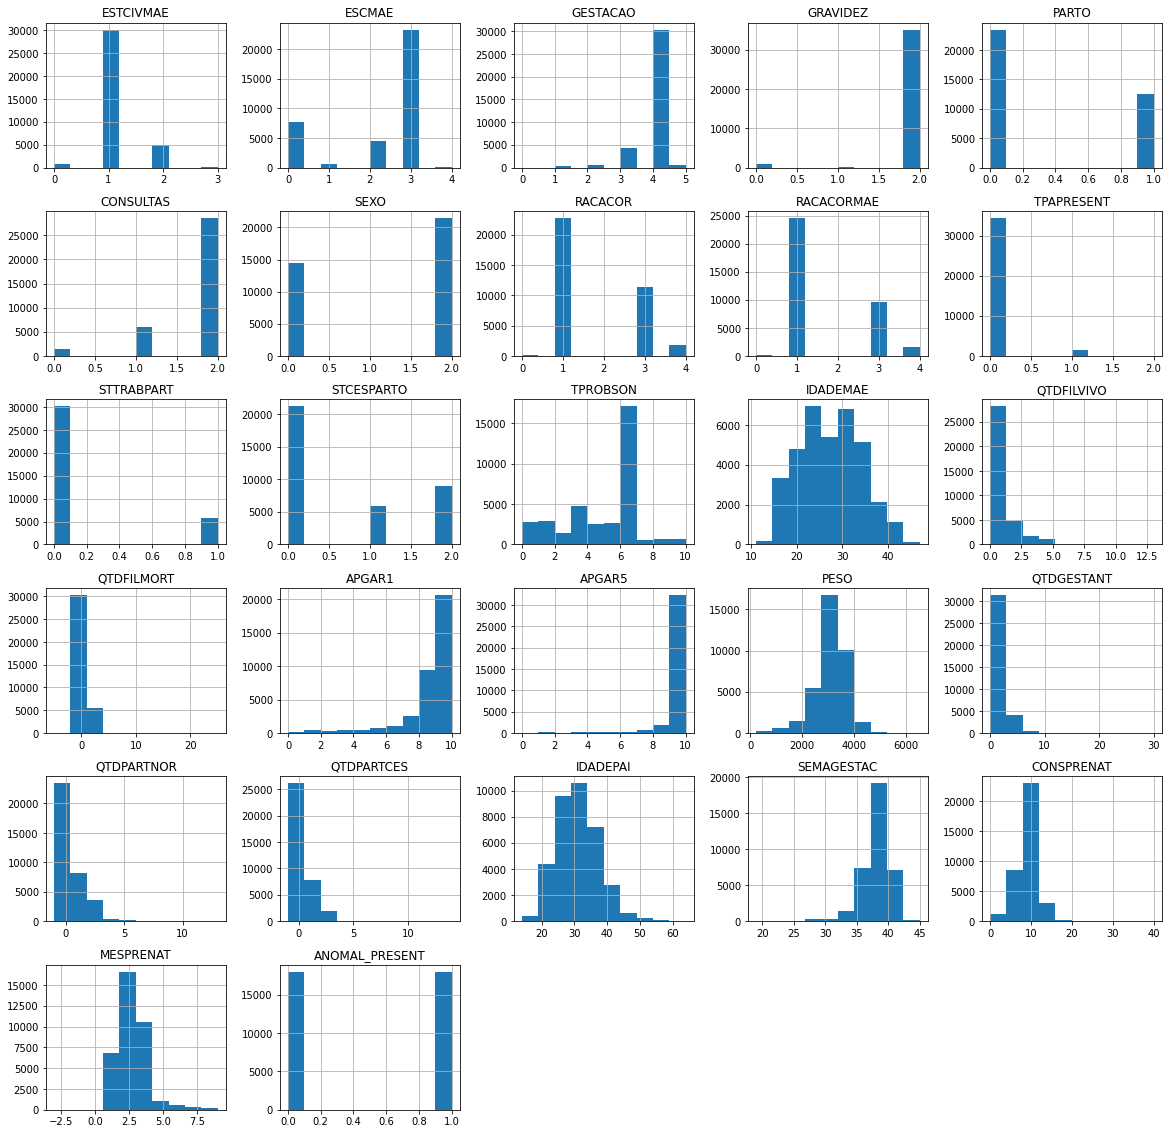

In [60]:
df_hist.hist(figsize = (20,20))

One Hot encoding categorical columns

In [61]:
df_cats_imp = fe.one_hot_encode_columns(df_cats_imp,df_cats_imp.columns)
df_cats_imp.head()

,Separado_Judicial,Solteiro,Uniao_Estavel,Viuvo,12_+_esc,1_3_esc,4_7_esc,8_11_esc,sem_esc,22_-_semgest,...,robson_10,robson_11,robson_2,robson_3,robson_4,robson_5,robson_6,robson_7,robson_8,robson_9
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Recuperando dataframe processado final

In [62]:
df_processed = df_cats_imp.join(df_consts_imp)
df_processed.head()

,Separado_Judicial,Solteiro,Uniao_Estavel,Viuvo,12_+_esc,1_3_esc,4_7_esc,8_11_esc,sem_esc,22_-_semgest,...,APGAR5,PESO,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,SEMAGESTAC,CONSPRENAT,MESPRENAT,ANOMAL_PRESENT
0,0,0,1,0,0,0,0,1,0,0,...,9,3335,1,0,1,28,38,11,1,0
1,0,1,0,0,0,0,1,0,0,0,...,10,3150,1,1,0,29,38,8,2,0
2,0,1,0,0,0,0,1,0,0,0,...,9,3350,0,0,0,21,39,8,3,1
3,0,1,0,0,0,0,0,1,0,0,...,9,2960,2,2,0,36,38,5,7,1
4,0,1,0,0,1,0,0,0,0,0,...,8,1485,0,0,0,38,30,8,2,0


Fazendo split e normalização

In [63]:
X,y = fe._split_df_in_xy(df_processed,target_column='ANOMAL_PRESENT')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = fe.fit_normalizer(df_train=X_train ,normalization_strategy='min_max_scaler')
X_train = fe.normalize_data(X_train,scaler)
X_test = fe.normalize_data(X_test,scaler)

## Model

Random forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Extracting Metrics

Classification Report

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.66      3580
           1       0.66      0.63      0.64      3623

    accuracy                           0.65      7203
   macro avg       0.65      0.65      0.65      7203
weighted avg       0.65      0.65      0.65      7203



Roc Curve

<AxesSubplot:title={'center':'Curva ROC'}, xlabel='Taxa de Falso Positivo', ylabel='Taxa de Verdadeiro Positivo'>

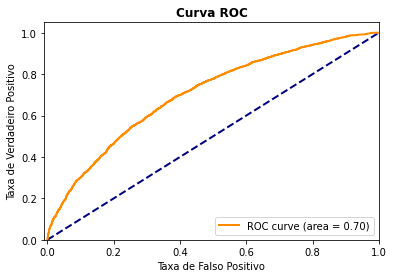

In [67]:
y_pred_prob = clf.predict_proba(X_test)
vi.plot_roc_curve(y_true = np.array(y_test), y_prob = y_pred_prob, labels = ['not_anomalie','anomalie'])

Confusion Matrix

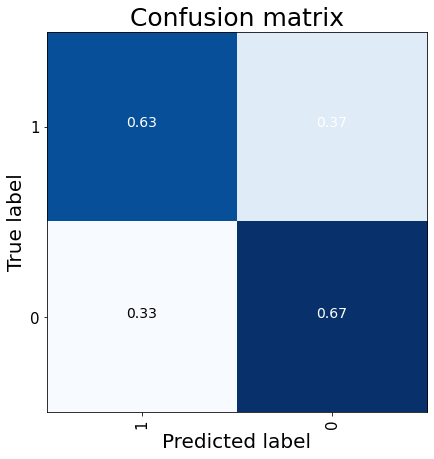

In [68]:
vi.plot_confusion_matrix(y_true=y_test, y_pred=y_pred,labels=y_train.unique())

## Explaining Model

https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [69]:
fig = plt.Figure()
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

Feature: 0, Score: 0.00219
Feature: 1, Score: 0.00695
Feature: 2, Score: 0.00762
Feature: 3, Score: 0.00079
Feature: 4, Score: 0.00550
Feature: 5, Score: 0.00186
Feature: 6, Score: 0.00507
Feature: 7, Score: 0.00598
Feature: 8, Score: 0.00027
Feature: 9, Score: 0.00034
Feature: 10, Score: 0.00140
Feature: 11, Score: 0.00195
Feature: 12, Score: 0.00466
Feature: 13, Score: 0.00637
Feature: 14, Score: 0.00223
Feature: 15, Score: 0.00240
Feature: 16, Score: 0.00014
Feature: 17, Score: 0.00244
Feature: 18, Score: 0.02198
Feature: 19, Score: 0.02782
Feature: 20, Score: 0.00329
Feature: 21, Score: 0.00519
Feature: 22, Score: 0.00608
Feature: 23, Score: 0.00988
Feature: 24, Score: 0.00054
Feature: 25, Score: 0.00961
Feature: 26, Score: 0.00055
Feature: 27, Score: 0.04811
Feature: 28, Score: 0.00019
Feature: 29, Score: 0.01864
Feature: 30, Score: 0.00867
Feature: 31, Score: 0.00043
Feature: 32, Score: 0.04956
Feature: 33, Score: 0.00021
Feature: 34, Score: 0.01504
Feature: 35, Score: 0.00784
Fe

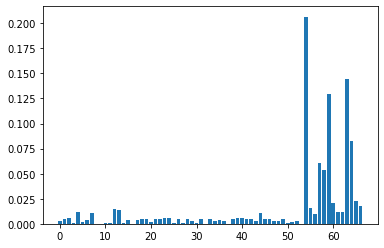

In [322]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [70]:
df_explain = pd.DataFrame(columns=['feature','importance'])
df_explain['feature'] = X_train.columns
df_explain['importance'] = importance
df_explain_ordered = df_explain.sort_values('importance',ascending=False)
df_explain_ordered.head(10)

,feature,importance
60,PESO,0.080887
58,APGAR1,0.073095
59,APGAR5,0.069465
67,MESPRENAT,0.066650
50,robson_5,0.050341
32,raca_mae_branca,0.049557
27,raca_branca,0.048112
64,IDADEPAI,0.045765
55,IDADEMAE,0.040543
66,CONSPRENAT,0.040530
